In [1]:
import pandas as pd

In [2]:
thor1 = pd.read_csv('thor_1.csv', sep=',')
thor2 = pd.read_csv('thor_2.csv', sep=',')
thor3 = pd.read_csv('thor_3.csv', sep=',')
thor4 = pd.read_csv('thor_4.csv', sep=',')
thor5 = pd.read_csv('thor_5.csv', sep=',')
thor6 = pd.read_csv('thor_6.csv', sep=',')
thor7 = pd.read_csv('thor_7.csv', sep=',')

In [3]:
thor_df = pd.concat([thor1, thor2, thor3, thor4, thor5, thor6, thor7],ignore_index=True)

In [8]:
#cleaning duplicates
thor_df = thor_df.drop_duplicates()
thor_df = thor_df.reset_index(drop=True)

In [12]:
#chaning date time format
thor_df['Postdate'] = pd.to_datetime(thor_df['Postdate'])

In [14]:
#changing floats to ints
thor_df['Likes'] = thor_df['Likes'].fillna(0)
thor_df['Likes'] = thor_df['Likes'].astype(int)
thor_df['Reviews'] = thor_df['Reviews'].fillna(0)
thor_df['Reviews'] = thor_df['Reviews'].astype(int)

In [30]:
thor_df.to_csv("thor_df.csv", sep=',', index=False)

**PLOT NUM Of STORIES BY YEAR**

<AxesSubplot:xlabel='Postdate'>

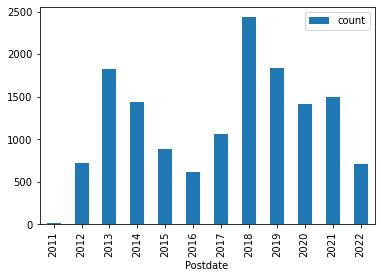

In [15]:
thor_df['Title'].groupby([thor_df['Postdate'].dt.year]).agg({'count'}).plot.bar()

In [16]:
#counting number of tags per fanfic
thor_df['Tags_Count'] = thor_df['Tags'].apply(lambda x: x.count('|')+1)

**average number of tags per story**

In [17]:
thor_df['Tags_Count'].mean()

7.6783686470018

**average of tags per year**

In [18]:
thor_df.groupby([thor_df['Postdate'].dt.year])['Tags_Count'].mean()

Postdate
2011     2.550000
2012     4.674965
2013     5.311196
2014     5.905094
2015     5.832765
2016     7.280844
2017     6.483962
2018     7.134813
2019     9.648693
2020     9.445390
2021     9.929286
2022    13.445851
Name: Tags_Count, dtype: float64

<AxesSubplot:xlabel='Postdate'>

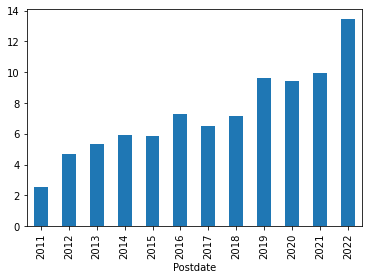

In [19]:
thor_df.groupby([thor_df['Postdate'].dt.year])['Tags_Count'].mean().plot.bar()

<AxesSubplot:xlabel='Postdate'>

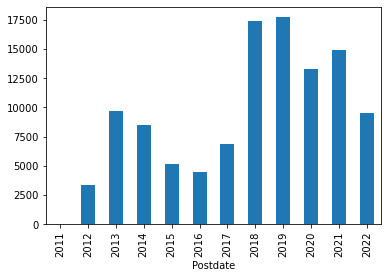

In [20]:
#sum of tags by year
thor_df.groupby([thor_df['Postdate'].dt.year])['Tags_Count'].sum().plot.bar()

**NUMBER OF FANDOMS**

In [21]:
#counting number of fandoms per fanfic
thor_df['Fandom_Count'] = thor_df['Fandom'].apply(lambda x: x.count(',')+1)

In [22]:
thor_df['Fandom_Count'].mean()

2.71292064810968

<AxesSubplot:xlabel='Postdate'>

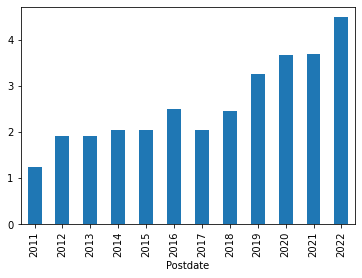

In [23]:
thor_df.groupby([thor_df['Postdate'].dt.year])['Fandom_Count'].mean().plot.bar()

<AxesSubplot:xlabel='Postdate'>

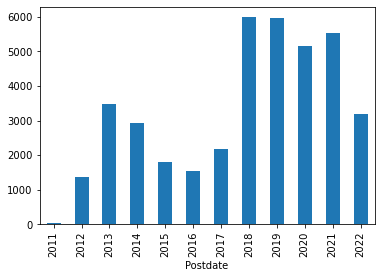

In [24]:
thor_df.groupby([thor_df['Postdate'].dt.year])['Fandom_Count'].sum().plot.bar()

**NUMBER OF CHARACTERS AND PAIRINGS**

In [25]:
thor_df['Charships'] = thor_df['Charships'].astype('str')

In [26]:
thor_df['Char_Count'] = thor_df['Charships'].apply(lambda x: x.count(',')+1)

In [27]:
thor_df['Char_Count'].mean()

4.273715551862623

<AxesSubplot:xlabel='Postdate'>

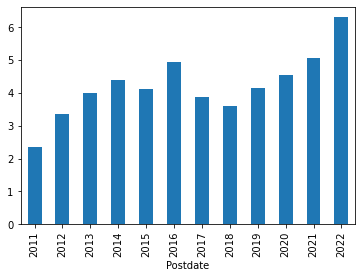

In [28]:
thor_df.groupby([thor_df['Postdate'].dt.year])['Char_Count'].mean().plot.bar()